####Start up spending versus profit

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending. Source: https://www.kaggle.com/datasets/farhanmd29/50-startups

In [32]:
df = pd.read_csv('50_Startups.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [34]:
display(df.head())

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [36]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


##Amount of money spend on marketing versus profit 

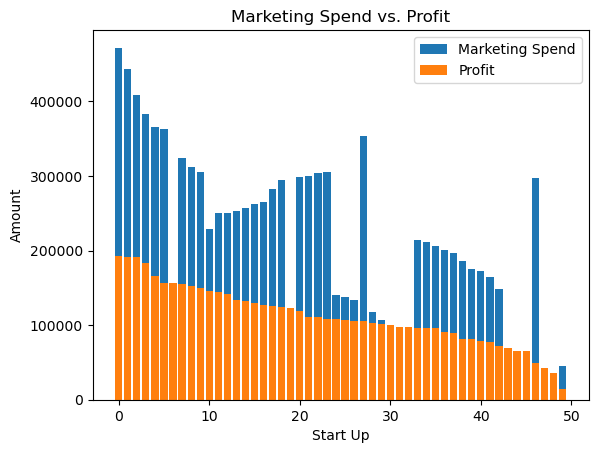

In [33]:
plt.bar(df.index, df['Marketing Spend'], label='Marketing Spend')
plt.bar(df.index, df['Profit'], label='Profit')

plt.xlabel('Start Up')
plt.ylabel('Amount')
plt.title('Marketing Spend vs. Profit')

plt.legend()
plt.show()

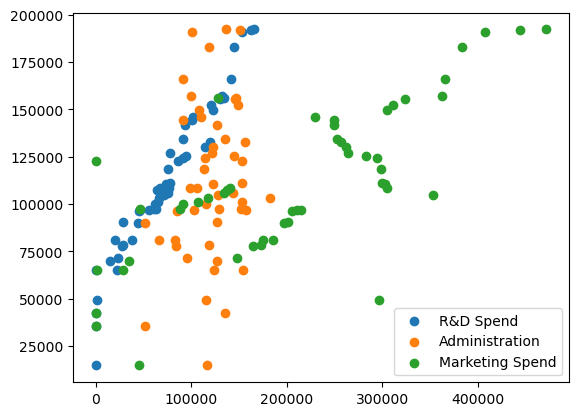

In [38]:
plt.scatter(x=df["R&D Spend"] , y=df["Profit"])
plt.scatter(x=df["Administration"] , y=df["Profit"])
plt.scatter(x=df["Marketing Spend"] , y=df["Profit"])
plt.legend(["R&D Spend" , "Administration" , "Marketing Spend"])
plt.show()

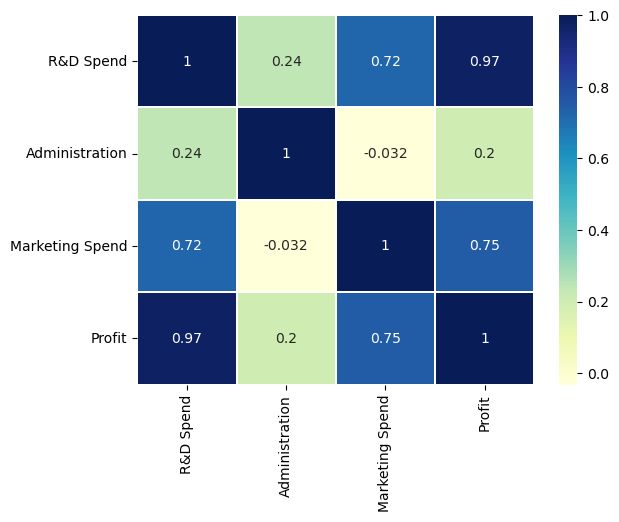

In [41]:
sns.heatmap(df.corr() , cmap='YlGnBu' ,annot=True ,linewidths='0.2')
plt.show()

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
display(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

array([[103015.2 , 103282.38],
       [132582.28, 144259.4 ],
       [132447.74, 146121.95],
       [ 71976.1 ,  77798.83],
       [178537.48, 191050.39],
       [116161.24, 105008.31],
       [ 67851.69,  81229.06],
       [ 98791.73,  97483.56],
       [113969.44, 110352.25],
       [167921.07, 166187.94]])

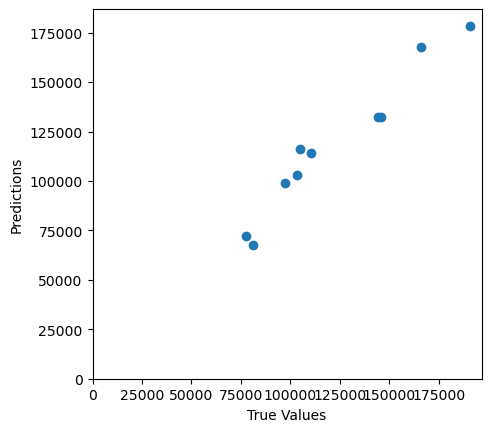

In [10]:
plt.scatter(y_test, y_pred)

plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.axis("equal")
plt.axis("square")
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])
plt.show()
